In [3]:
import os
import sys

# Get notebook directory path
notebook_dir = os.getcwd()

# Get project root directory
project_root = os.path.dirname(notebook_dir)

# Add project root to Python path if not already there
if project_root not in sys.path:
    sys.path.append(project_root)

print(project_root)
COLLECT_TIMES = 10
COLLECT_FRAMES = 30

/Users/gregyoungforever/Documents/ISEP2024-2025/Deeplearning/DL


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Define words and data path
words_list = ["class", "deep", "learning", "for", "thank you", "this"] 
words_dir = os.path.join(project_root, "MP_data")
X = []
y = []
for word in words_list:
    for i in range(COLLECT_TIMES):
        sequence = []
        for j in range(COLLECT_FRAMES):
            file_path = os.path.join(words_dir, word, f"{i}", f"{j}.npy")
            frame_data = np.load(file_path)
            sequence.append(frame_data)
        X.append(sequence)    
        y.append(word)

X = np.array(X)  # shape: (num_samples, sequence_length, num_features)
y_encoded = le.fit_transform(y)

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

df = pd.DataFrame({
    'sequence': list(X), 
    'label': y,  
    'label_encoded': y_encoded  
})

print("\nDataFrame info:")
print(df.info())
print("\nSample sequence shape:", df['sequence'].iloc[0].shape)



Label mapping: {np.str_('class'): np.int64(0), np.str_('deep'): np.int64(1), np.str_('for'): np.int64(2), np.str_('learning'): np.int64(3), np.str_('thank you'): np.int64(4), np.str_('this'): np.int64(5)}

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sequence       60 non-null     object
 1   label          60 non-null     object
 2   label_encoded  60 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
None

Sample sequence shape: (30, 1662)


In [15]:
df.iloc[0].get('sequence').shape    

(30, 1662)

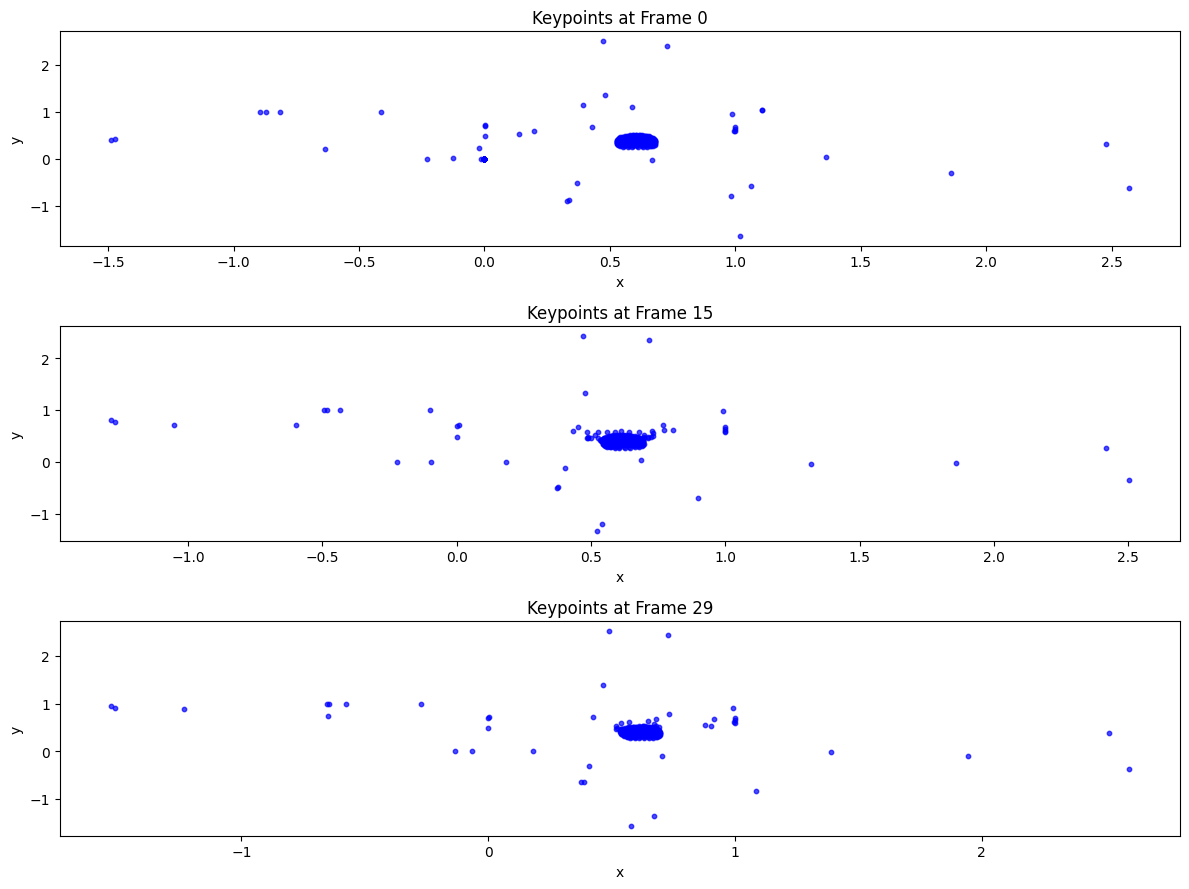

In [16]:
import matplotlib.pyplot as plt

def plot_single_sequence(sequence, feature_names=None, frame_idx=None):
    T, D = sequence.shape
    if frame_idx is None:
        frame_idx = [0, T//2, T-1] 
    plt.figure(figsize=(12, 3 * len(frame_idx)))
    for i, idx in enumerate(frame_idx):
        plt.subplot(len(frame_idx), 1, i+1)
        data = sequence[idx]
        plt.scatter(data[::3], data[1::3], c='b', s=10, alpha=0.7)
        plt.title(f"Keypoints at Frame {idx}")
        plt.xlabel("x")
        plt.ylabel("y")
    plt.tight_layout()
    plt.show()


plot_single_sequence(df['sequence'].iloc[0])

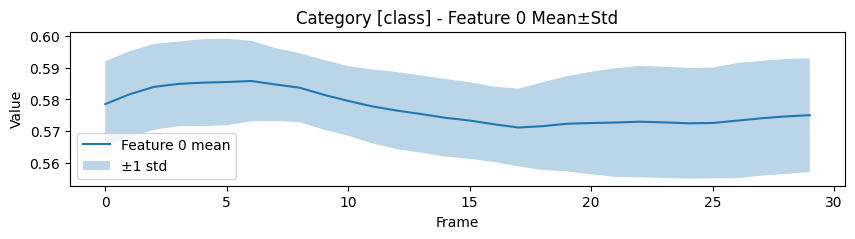

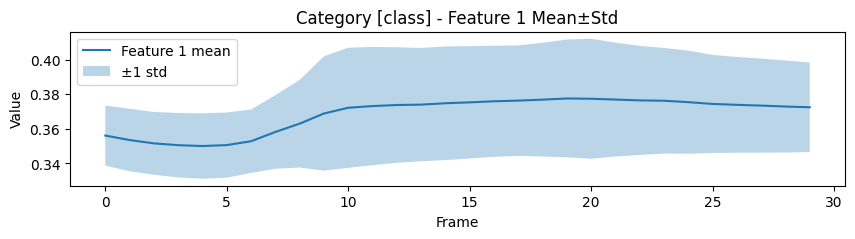

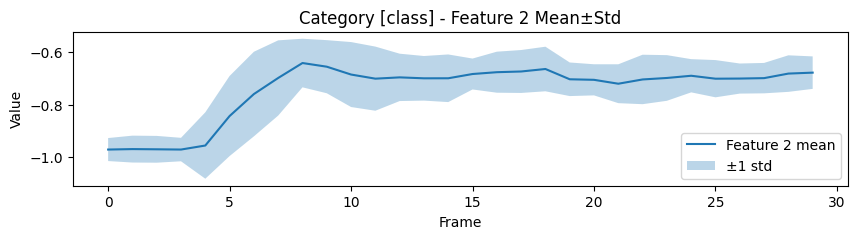

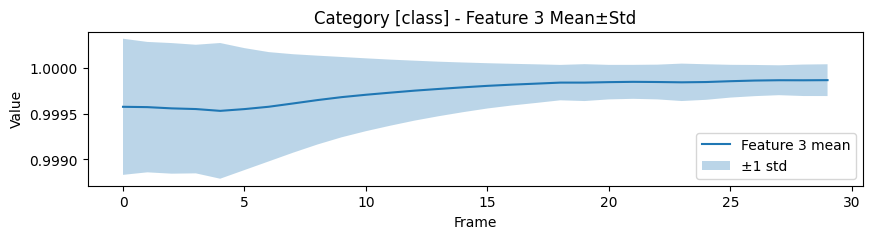

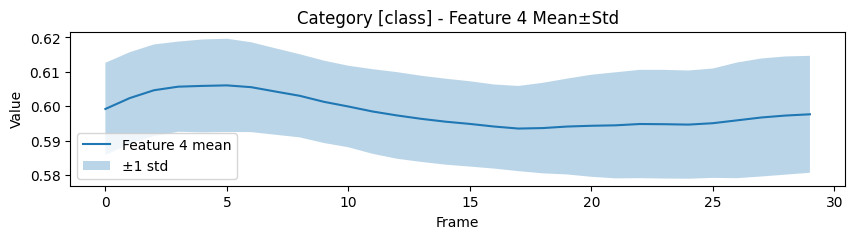

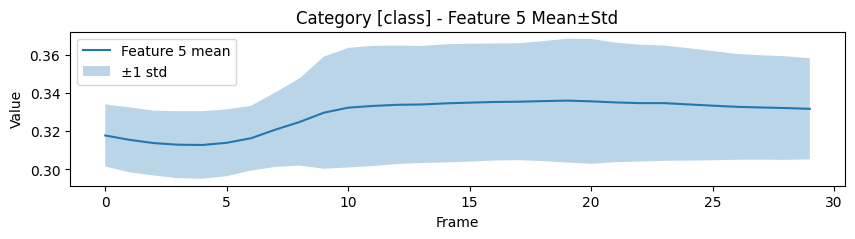

In [17]:
def plot_category_mean_std(df, label_name, n_features_show=6):
    subset = df[df['label'] == label_name]['sequence'].to_list()
    arr = np.stack(subset)  # shape: (N, T, D)
    mean = arr.mean(axis=0)  # (T, D)
    std = arr.std(axis=0)
    T = mean.shape[0]
    for i in range(n_features_show):
        plt.figure(figsize=(10, 2))
        plt.plot(range(T), mean[:, i], label=f'Feature {i} mean')
        plt.fill_between(range(T), mean[:, i]-std[:, i], mean[:, i]+std[:, i], alpha=0.3, label=f'±1 std')
        plt.title(f'Category [{label_name}] - Feature {i} Mean±Std')
        plt.xlabel('Frame')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

plot_category_mean_std(df, label_name="class")

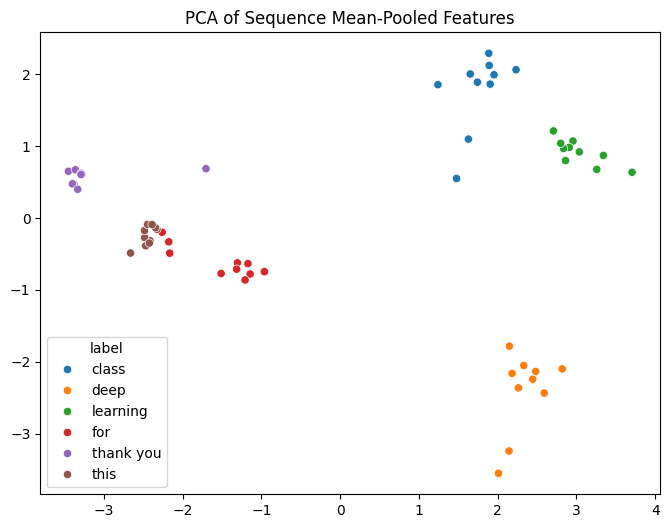

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


pooled = np.stack([seq.mean(axis=0) for seq in df['sequence']])
labels = df['label']


pca = PCA(n_components=2)
X_pca = pca.fit_transform(pooled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10")
plt.title("PCA of Sequence Mean-Pooled Features")
plt.show()

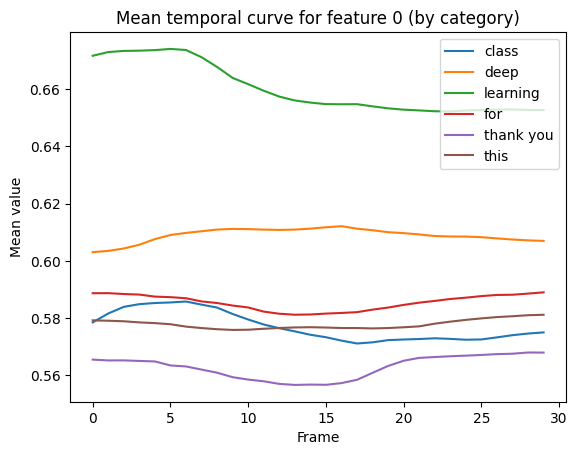

In [19]:
def plot_multi_category_mean(df, feature_idx=0):
    for label in df['label'].unique():
        arr = np.stack(df[df['label']==label]['sequence'])
        mean = arr.mean(axis=0)[:, feature_idx]
        plt.plot(range(len(mean)), mean, label=label)
    plt.title(f"Mean temporal curve for feature {feature_idx} (by category)")
    plt.xlabel('Frame')
    plt.ylabel('Mean value')
    plt.legend()
    plt.show()

plot_multi_category_mean(df, feature_idx=0)

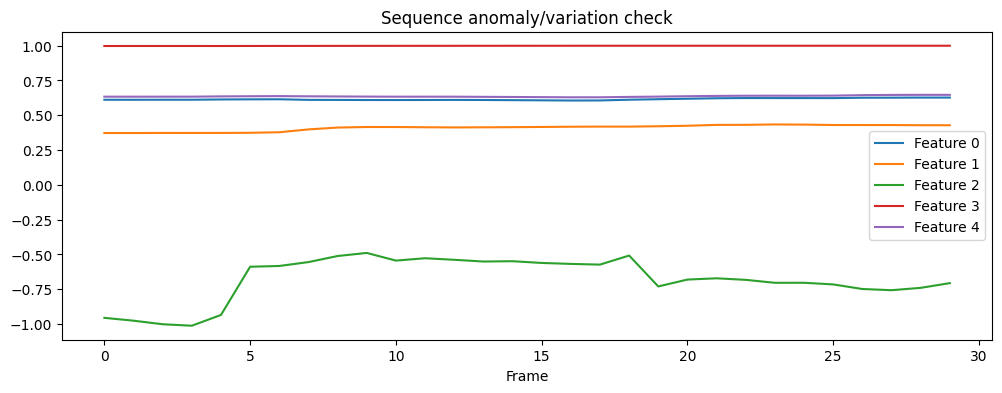

In [20]:
def plot_sequence_anomaly(sequence):
    plt.figure(figsize=(12, 4))
    for i in range(min(sequence.shape[1], 5)):  
        plt.plot(sequence[:, i], label=f'Feature {i}')
    plt.title("Sequence anomaly/variation check")
    plt.xlabel("Frame")
    plt.legend()
    plt.show()

plot_sequence_anomaly(df['sequence'].iloc[0])